In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# load dataset
demo = pd.read_csv("demo1.csv")
feature_cols = ['Moisture_Soil', 'Moisture_Air']
X = demo[feature_cols] 
y = demo.Class

Accuracy: 0.9818181818181818
[[50  0  0]
 [ 1  2  0]
 [ 0  0  2]]


C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['d', 'm', 'w'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


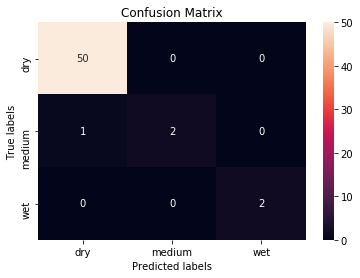

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
tr = DecisionTreeClassifier(criterion="entropy")
tr = tr.fit(X_train,y_train)
y_pred = tr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
labels=['d','m','w']
print(confusion_matrix(y_test, y_pred,labels))

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred,labels), annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['dry', 'medium','wet']); ax.yaxis.set_ticklabels(['dry', 'medium','wet']);

In [4]:
new_input = [[1020,1000]]
new_output = tr.predict(new_input)
print(new_input, new_output)

[[1020, 1000]] ['d']


In [5]:
new_input = demo.iloc[-1:,1:3].values
new_output = tr.predict(new_input)
print(new_input, new_output)

[[ 992 1012]] ['d']


In [6]:
new_input = X.tail(1)
new_output = tr.predict(new_input)
print(new_input, new_output)

     Moisture_Soil  Moisture_Air
135            992          1012 ['d']


In [7]:
print(demo.groupby('Class').size())
print(demo.describe())

Class
d    122
m      9
w      5
dtype: int64
       Moisture_Soil  Moisture_Air
count     136.000000    136.000000
mean      949.992647    942.558824
std       144.489061    177.169212
min       198.000000    175.000000
25%       984.000000    982.250000
50%       990.000000   1011.000000
75%       994.000000   1018.000000
max      1018.000000   1023.000000


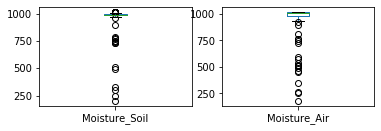

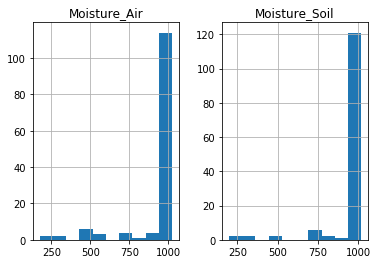

In [8]:
# box and whisker plots
demo.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
# histograms
demo.hist()
plt.show()


[Text(186.0, 475.65000000000003, 'X[0] <= 880.5\nentropy = 0.605\nsamples = 81\nvalue = [72, 6, 3]'),
 Text(139.5, 339.75, 'X[0] <= 621.0\nentropy = 1.295\nsamples = 10\nvalue = [1, 6, 3]'),
 Text(93.0, 203.85000000000002, 'X[1] <= 681.0\nentropy = 0.811\nsamples = 4\nvalue = [1, 0, 3]'),
 Text(46.5, 67.94999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(139.5, 67.94999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(186.0, 203.85000000000002, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(232.5, 339.75, 'entropy = 0.0\nsamples = 71\nvalue = [71, 0, 0]')]

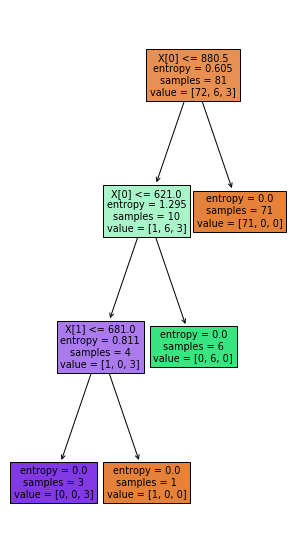

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
demo = pd.read_csv("demo1.csv")
feature_cols = ['Moisture_Soil', 'Moisture_Air']
X = demo[feature_cols] 
y = demo.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
tr = DecisionTreeClassifier(criterion="entropy")
tr = tr.fit(X_train,y_train)
plt.figure(figsize=(5,10))
tree.plot_tree(tr,filled=True)

In [10]:
print(tree.export_text(tr))

|--- feature_0 <= 880.50
|   |--- feature_0 <= 621.00
|   |   |--- feature_1 <= 681.00
|   |   |   |--- class: w
|   |   |--- feature_1 >  681.00
|   |   |   |--- class: d
|   |--- feature_0 >  621.00
|   |   |--- class: m
|--- feature_0 >  880.50
|   |--- class: d



In [11]:
import pickle
pickle.dump(tr, open('drynesspredict.pkl', 'wb'))